In [1]:
import SimpleITK as sitk
import numpy as np
import sys
sys.path.append('../../')

from scripts.Registration3D.registration import central_normalize_img, calculate_ct2us_transform

%load_ext autoreload

%autoreload 2

In [ ]:
def flip_img(input_img,orders):
    flipped_ct = sitk.Flip(input_img,orders)
    flipped_ct = sitk.GetImageFromArray(sitk.GetArrayFromImage(flipped_ct).astype(np.float64))
    flipped_ct.SetOrigin(input_img.GetOrigin())
    flipped_ct.SetSpacing(input_img.GetSpacing())
    return flipped_ct

original_vessel_ct = sitk.ReadImage('vessel_ct.nii.gz')
# The left-right order is different between the US image and CT image. We flip vessel_ct to make them consistent.
original_vessel_ct = flip_img(original_vessel_ct,[True,False,False])
vessel_ct = central_normalize_img(original_vessel_ct,150)



original_vessel_us = sitk.ReadImage('vessel_us.nii.gz')
vessel_us = central_normalize_img(original_vessel_us,150)

CT2US = calculate_ct2us_transform(vessel_us,vessel_ct)

# Visualize registration result

In [7]:
body_ct = sitk.ReadImage('CT_phantom_regular.nii.gz')
body_ct = flip_img(body_ct,[True,False,False])

In [11]:
import pickle as pkl

with open('frames.pkl','rb') as fp:
    data = pkl.load(fp)

In [12]:
type(data)

list

CT


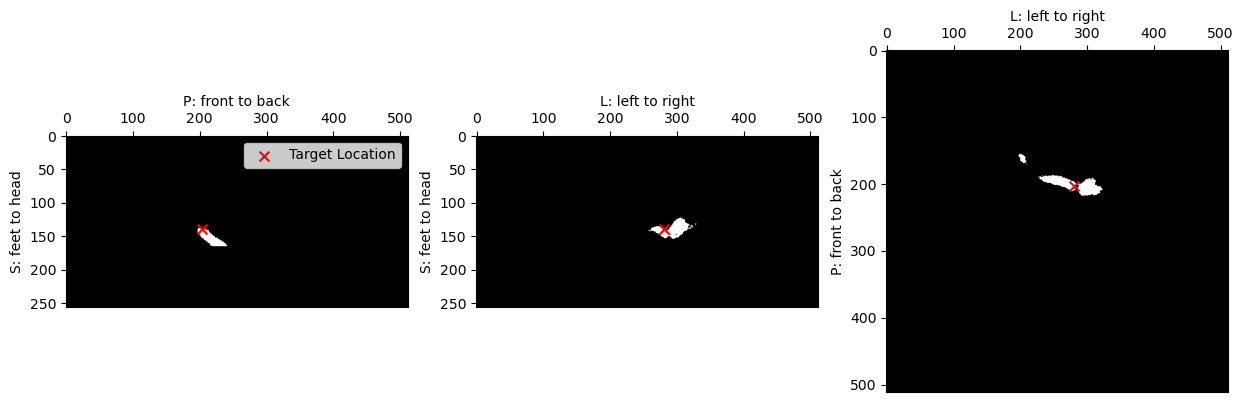

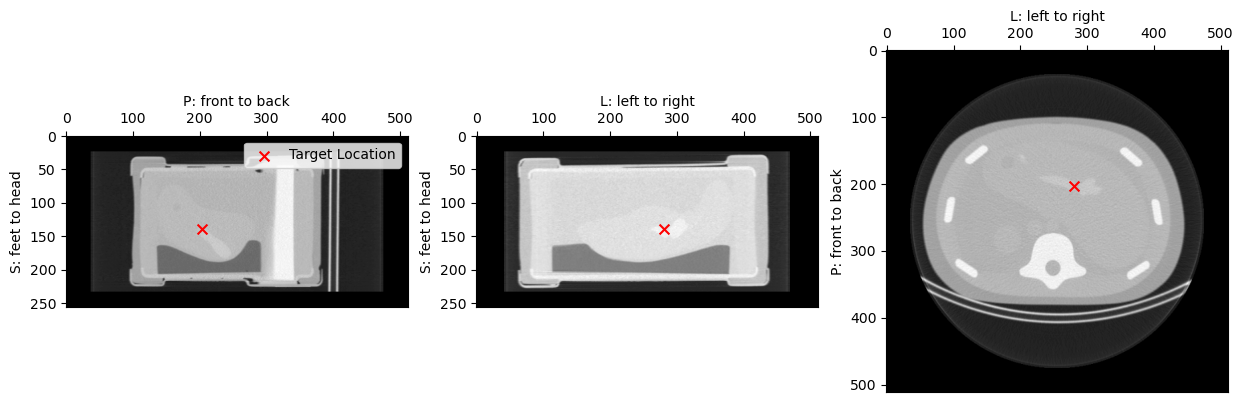

Ultrasound


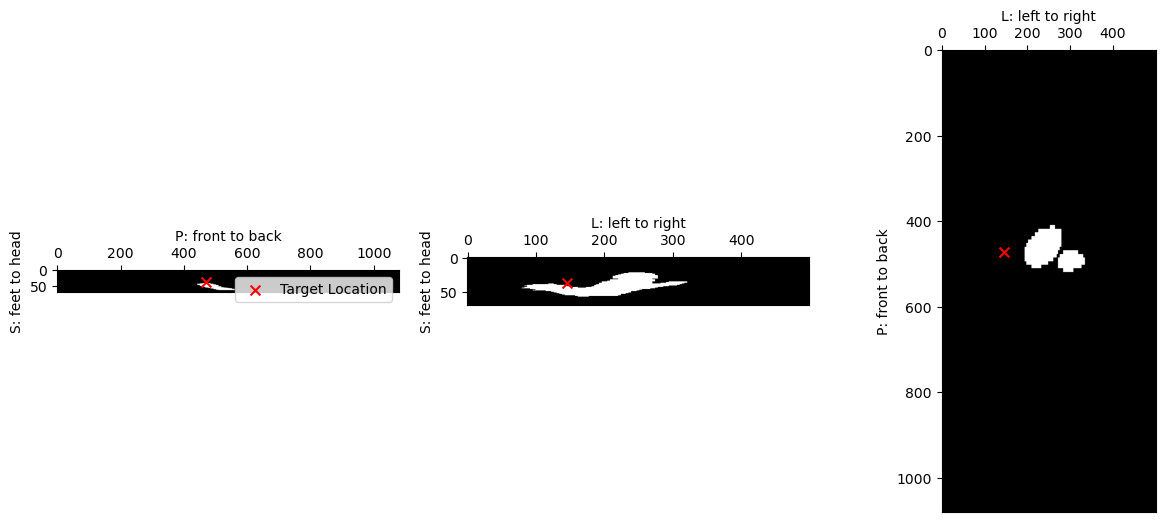

In [9]:
from scripts.Registration3D.registration import visualize_vessel,get_centroid_loc
target_loc_ct = get_centroid_loc(original_vessel_ct) + np.array([0,0,0])
pix = original_vessel_ct.TransformPhysicalPointToIndex(target_loc_ct)
print("CT")
visualize_vessel(original_vessel_ct,pix)

visualize_vessel(body_ct,pix)


target_loc_us = CT2US.TransformPoint(target_loc_ct)
pix = original_vessel_us.TransformPhysicalPointToIndex(target_loc_us)
print("Ultrasound")
visualize_vessel(original_vessel_us,pix)